## ME40: Dimensional & Data Analyses in Engineering
### HW 5 - Monday November 12th, 2025
#### Marissa Till

### Problem 1 - Learning by practicing…
##### (This was done in Python rather than MATLAB)

In the lectures, two datasets were used as examples to perform regressions. The CSV files are available in the module on Canvas. The goal is for you to practice performing these regressions yourselves. You cannot use built-in MATLAB functions. You are free to use the sum function or write your own do loops.

In [55]:
# === Import Required Packages ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Case 1 – Week5_rnd.csv
1. Write a MATLAB script to load the data, perform a linear fit (𝑦 = 𝑎x + 𝑏), and plot the result of the fit as a line along with the data as symbols.

    Note: do not forget axis labels and legend!

2. Extend the script to compute all three sums-of-squares and the 𝑅$^2$ value.

In [56]:
# === 1. Load the data ===

filepath = '/Users/marissatill/Downloads/junior year/fall/me40/sets/week 7/Week5_rnd.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(filepath, sep='\t')

# Extract columns for the velocity components
x = df['% x'].values  # X values
y  = df['y'].values   # Y values

print("Dataframe Shape:", df.shape)  # (Number of samples, number of components)

Dataframe Shape: (100, 2)


In [57]:
# === 1. Perform a linear fit ===

x_mean = np.mean(x)
y_mean = np.mean(y)

a = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)  # Slide 109 Linear Regression
b = y_mean - a * x_mean  # Slide 109 Linear Regression

print(f"Linear fit coefficients: a = {a:.4f}, b = {b:.4f}")

Linear fit coefficients: a = 1.0129, b = 0.1279


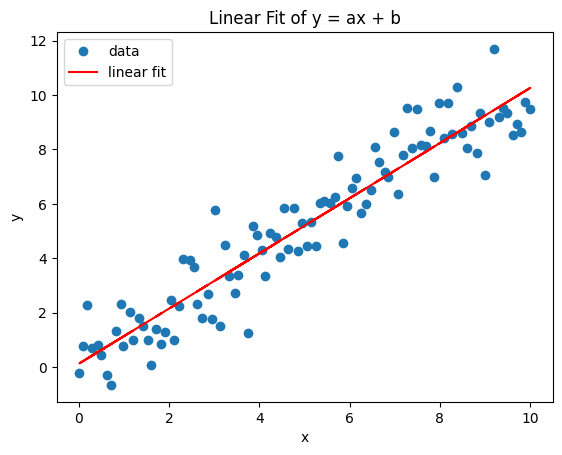

In [65]:
# === 1. Plot the Result ===

plt.figure()
plt.plot(x, y, 'o', label='data')               # Data points
plt.plot(x, a*x + b, 'r-', label='linear fit')  # Fitted line
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit of y = ax + b')
plt.legend()
plt.show()

In [59]:
# === 2. Compute all three sums-of-squares and the 𝑅² value ===

SST = np.sum((y - y_mean)**2)           # Sum of squares total
SSR = np.sum((a*x + b - y_mean)**2)     # Sum of squares regression
SSE = np.sum((y - (a*x + b))**2)        # Sum of squares error
R2 = SSR / SST                          # Coefficient of determination

print(f"SST = {SST:.4f}")
print(f"SSR = {SSR:.4f}")
print(f"SSE = {SSE:.4f}")
print(f"R²  = {R2:.4f}")

SST = 974.1388
SSR = 874.0556
SSE = 100.0832
R²  = 0.8973


#### Case 2 – Week5_cars.csv
3. Write a MATLAB script to load the data, perform a linear and a quadratic fit (mpg = 𝑓(weight)), and plot the result of the two fits as lines along with the data as symbols.

    Note: when plotting dimensional quantities, do not forget to add units in the axis labels…

    Note: for the quadratic fit, you should write/solve the 3 × 3 linear system.

4. Extend the script to compute the 𝑅$^2$ value for each fit.

In [60]:
# === 3. Load the data ===

filepath = '/Users/marissatill/Downloads/junior year/fall/me40/sets/week 7/Week5_cars.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(filepath, header=None)

# Extract columns for the velocity components
w = df[df.columns[0]].values  # Car weight (kg)
mpg = df[df.columns[1]].values         # Highway fuel efficiency (mpg)

print("Dataframe Shape:", df.shape)  # (Number of samples, number of components)

Dataframe Shape: (117, 2)


In [61]:
# === 3. Perform a linear fit ===

weight_mean = np.mean(w)
mpg_mean = np.mean(mpg)

a_car = (np.sum((w - weight_mean) * (mpg - mpg_mean)) /
         np.sum((w - weight_mean) ** 2))
b_car = mpg_mean - a_car * weight_mean

print(f"Linear fit coefficients: a = {a_car:.4f}, b = {b_car:.4f}")

Linear fit coefficients: a = -0.0110, b = 44.3507


In [62]:
# === 3. Perform a quadratic fit ===

# Write/solve the 3 × 3 linear system (Slide 116)
A = np.array([
    [np.sum(w**4), np.sum(w**3), np.sum(w**2)],
    [np.sum(w**3), np.sum(w**2), np.sum(w)],
    [np.sum(w**2), np.sum(w),    len(w)]
])

B = np.array([
    np.sum(w**2 * mpg),
    np.sum(w * mpg),
    np.sum(mpg)
])

# Solve the linear system for coefficients
C = np.linalg.solve(A, B)
c0, c1, c2 = C  # Equation: y = c0*x^2 + c1*x + c2

print(f"Quadratic fit coefficients: c0 = {c0:.4f}, c1 = {c1:.4f}, c2 = {c2:.4f}")

Quadratic fit coefficients: c0 = 0.0000, c1 = -0.0253, c2 = 56.6429


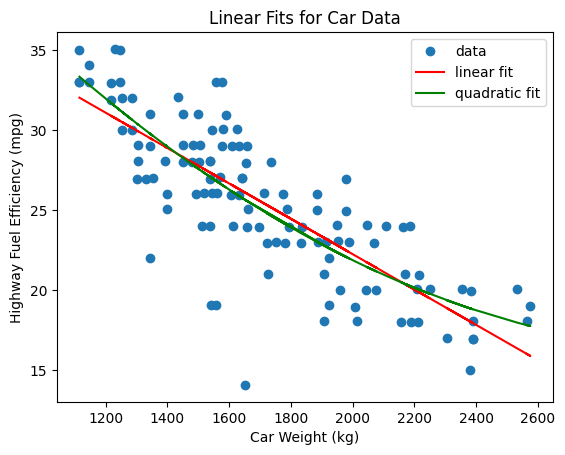

In [66]:
# === 3. Plot the Results ===

plt.figure()
plt.plot(w, mpg, 'o', label='data')                            # Data points
plt.plot(w, a_car * w + b_car, 'r-', label='linear fit')       # Fitted linear line
plt.plot(w, c0*w**2 + c1*w + c2, 'g-', label='quadratic fit')  # Fitted quadratic line
plt.xlabel('Car Weight (kg)')
plt.ylabel('Highway Fuel Efficiency (mpg)')
plt.title('Linear Fits for Car Data')
plt.legend()
plt.show()

In [67]:
# === 4. Compute the 𝑅² values for each fit ===

# --- Linear Fit ---
SST = np.sum((mpg - mpg_mean)**2)                  # Sum of squares total
SSR = np.sum((a_car * w + b_car - mpg_mean) ** 2)  # Sum of squares regression
R2_linear = SSR / SST                              # Coefficient of determination

# --- Quadratic Fit ---
SSR_q = np.sum((c0*w**2 + c1*w + c2 - mpg_mean) ** 2)  # Sum of squares regression quadratic
R2_quadratic = SSR_q / SST                             # Coefficient of determination quadratic

print(f"R² = {R2_linear:.4f}")
print(f"R² = {R2_quadratic:.4f}")

R²  = 0.6547
R²  = 0.6681
